# Business Understanding

## Project Domain

Artificial Intelligence in Preventive Healthcare
Proyek ini berada dalam domain kecerdasan buatan (AI) yang diterapkan pada layanan kesehatan preventif (preventive healthcare). Fokusnya adalah bagaimana teknologi seperti Artificial Neural Network (ANN) dapat digunakan untuk mendeteksi potensi penyakit serius lebih awal—dalam hal ini kanker paru-paru—sehingga pasien bisa mendapat penanganan sejak dini sebelum kondisi memburuk.

## Problem Statements

Kanker paru-paru merupakan salah satu penyebab utama kematian akibat kanker di seluruh dunia. Deteksi dini sangat penting, tetapi seringkali terhambat oleh keterbatasan akses, waktu, atau sumber daya medis. Banyak pasien yang tidak menyadari adanya risiko karena gejala awal yang samar dan data medis yang tersebar.

## Goals

Membangun sistem prediksi berbasis Artificial Neural Network (ANN) untuk mengidentifikasi apakah seorang pasien memiliki potensi terkena kanker paru-paru, hanya berdasarkan input dari beberapa faktor seperti: usia, kebiasaan merokok, kondisi pernapasan, stres, kadar saturasi oksigen, dan riwayat keluarga.

## Solution Statements

Solusi yang diusulkan adalah membangun model ANN yang dilatih pada data pasien untuk:

- Memprediksi status kesehatan terkait potensi kanker paru-paru (YA atau TIDAK).

- Memanfaatkan fitur penting seperti gejala fisik, faktor lingkungan, dan riwayat keluarga.

- Menghasilkan sistem prediksi yang bisa disimpan dan digunakan kembali, dengan akurasi yang telah ditingkatkan melalui tuning model dan preprocessing yang tepat.



# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mitapebrian","key":"839aef02cd93b4996cae59b2605cad07"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d shantanugarg274/lung-cancer-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/shantanugarg274/lung-cancer-prediction-dataset
License(s): CC0-1.0
  0% 0.00/127k [00:00<?, ?B/s]
100% 127k/127k [00:00<00:00, 278MB/s]


In [ ]:
!mkdir lung-cancer-prediction-dataset
!unzip lung-cancer-prediction-dataset.zip -d lung-cancer-prediction-dataset
!ls lung-cancer-prediction-dataset

mkdir: cannot create directory ‘lung-cancer-prediction-dataset’: File exists
Archive:  lung-cancer-prediction-dataset.zip
  inflating: lung-cancer-prediction-dataset/Lung Cancer Dataset.csv  
'Lung Cancer Dataset.csv'


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy



In [ ]:
df = pd.read_csv('lung-cancer-prediction-dataset/Lung Cancer Dataset.csv')

In [ ]:
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


## Exploratory Data Analysis

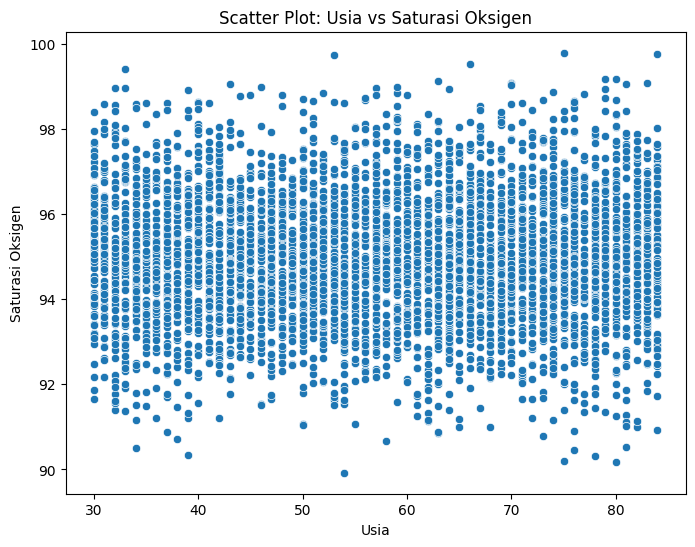

In [ ]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE', y='OXYGEN_SATURATION', data=df)
plt.title('Scatter Plot: Usia vs Saturasi Oksigen')
plt.xlabel('Usia')
plt.ylabel('Saturasi Oksigen')
plt.show()

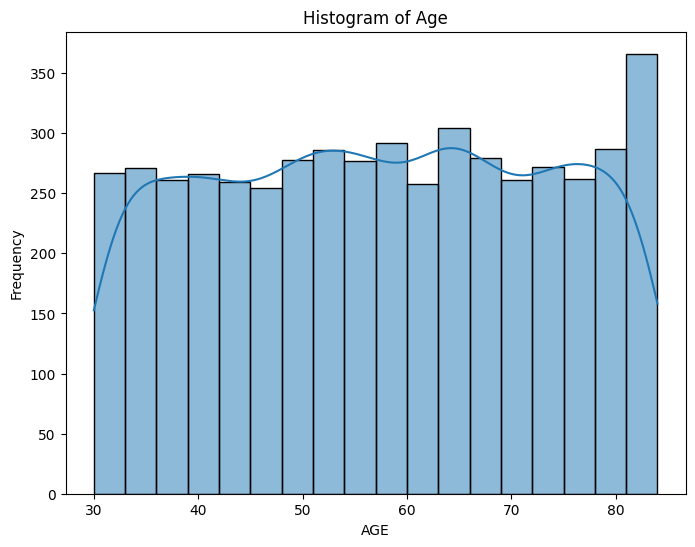

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

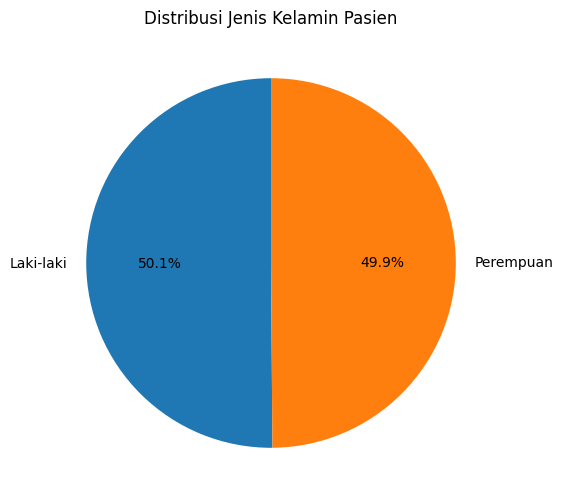

In [ ]:
# pie chart
gender_counts = df['GENDER'].value_counts()
labels = ['Laki-laki' if i == 1 else 'Perempuan' for i in gender_counts.index]
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Jenis Kelamin Pasien')
plt.show()



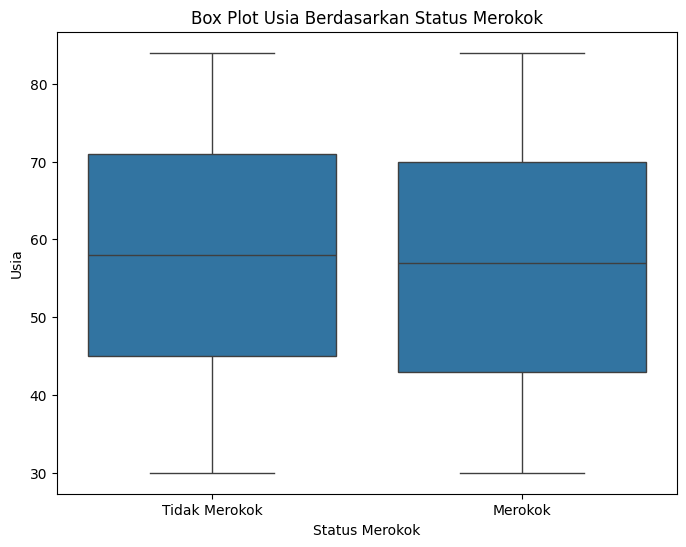

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='SMOKING', y='AGE', data=df)
plt.title('Box Plot Usia Berdasarkan Status Merokok')
plt.xlabel('Status Merokok')
plt.ylabel('Usia')
plt.xticks([0, 1], ['Tidak Merokok', 'Merokok'])
plt.show()

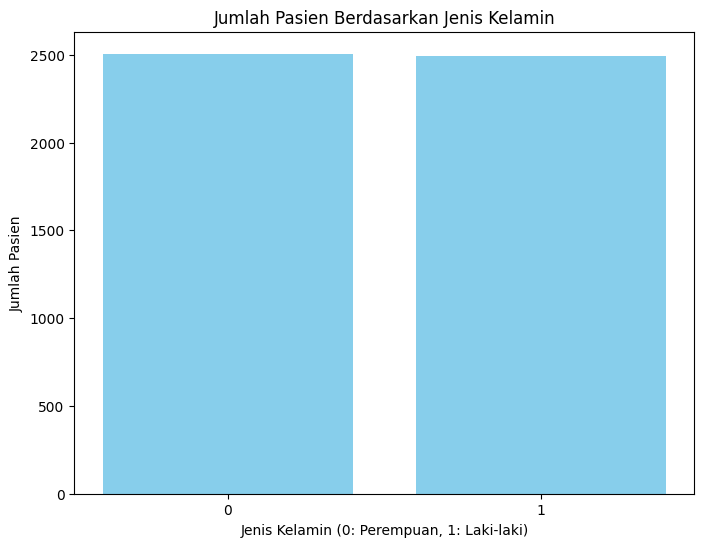

In [ ]:
#bar chart
gender_counts = df['GENDER'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index.astype(str), gender_counts.values, color='skyblue')
plt.xlabel('Jenis Kelamin (0: Perempuan, 1: Laki-laki)')
plt.ylabel('Jumlah Pasien')
plt.title('Jumlah Pasien Berdasarkan Jenis Kelamin')
plt.xticks([0, 1], ['0', '1'])
plt.show()

# Data Preparation

In [ ]:
# Encode target variable: 'PULMONARY_DISEASE' ('NO' = 0, 'YES' = 1)
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'NO': 0, 'YES': 1})

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns='PULMONARY_DISEASE')
y = df['PULMONARY_DISEASE']

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

# Modeling

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
# Callback untuk menghentikan training jika tidak ada peningkatan
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

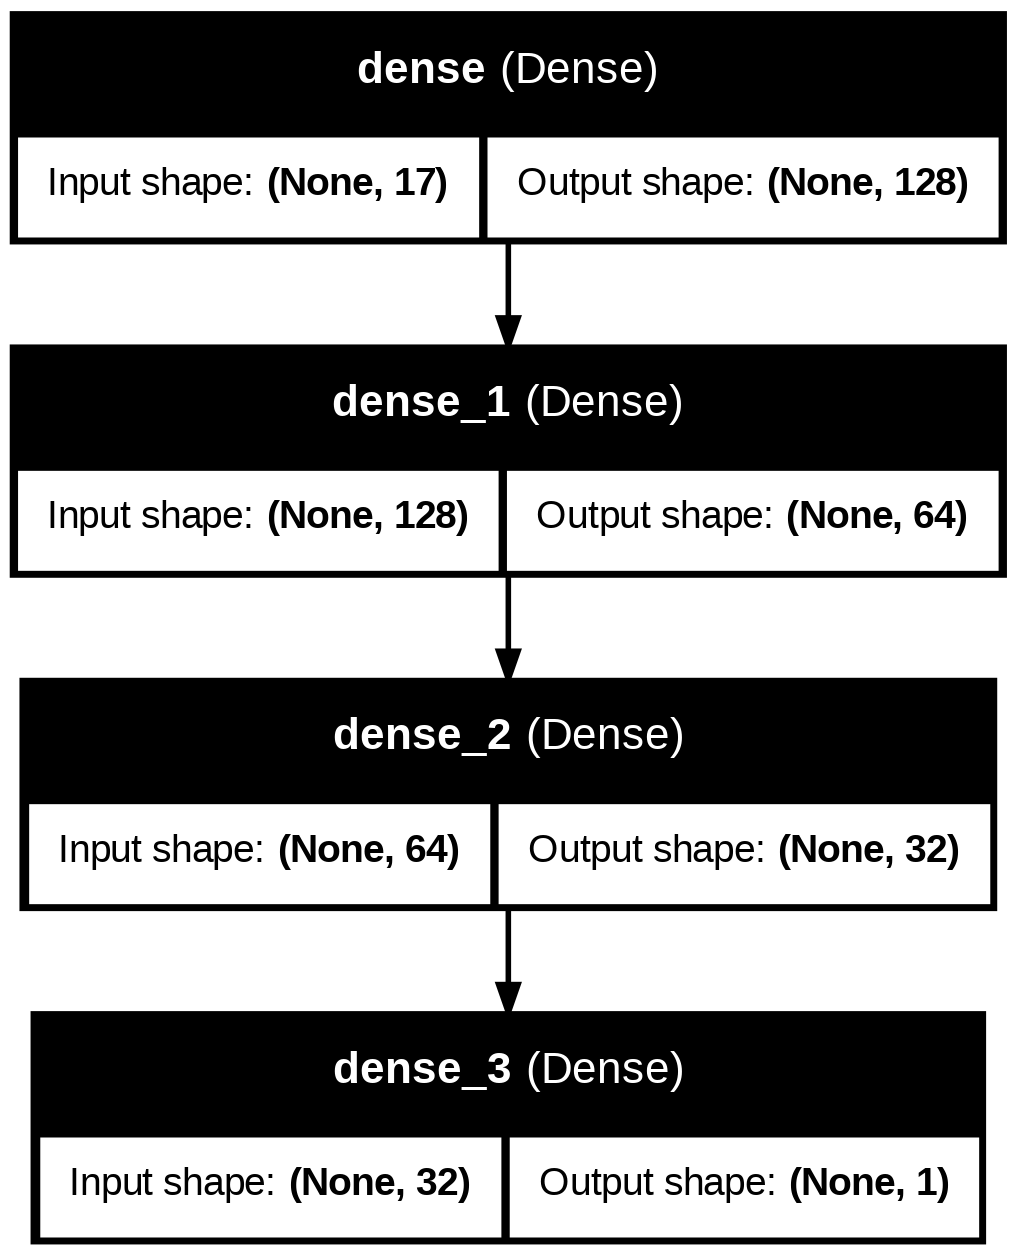

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Training model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7661 - loss: 0.5058 - val_accuracy: 0.9013 - val_loss: 0.3160
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8961 - loss: 0.3280 - val_accuracy: 0.8938 - val_loss: 0.3078
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9085 - loss: 0.2820 - val_accuracy: 0.8900 - val_loss: 0.3133
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9223 - loss: 0.2618 - val_accuracy: 0.8925 - val_loss: 0.3043
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9106 - loss: 0.2705 - val_accuracy: 0.8975 - val_loss: 0.2955
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.2412 - val_accuracy: 0.8975 - val_loss: 0.3088
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.2488 - val_accuracy: 0.9025 - val_loss: 0.3019
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9239 - loss: 0.2265 - val_accuracy: 0.

# Evaluation

In [ ]:
# Evaluasi model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAkurasi dari model: {acc * 100:.2f}%")


Akurasi dari model: 89.90%


In [ ]:
# Prediksi & Metrics
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[541  52]
 [ 49 358]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       593
           1       0.87      0.88      0.88       407

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [ ]:
# Akurasi Manual
acc_manual = accuracy_score(y_test, y_pred)
print(f"\nManual Accuracy Score: {acc_manual * 100:.2f}%")


Manual Accuracy Score: 89.90%


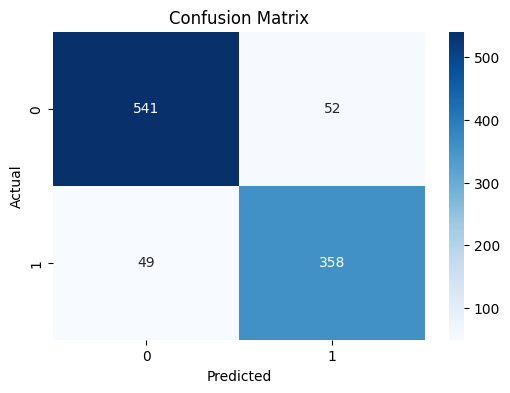

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


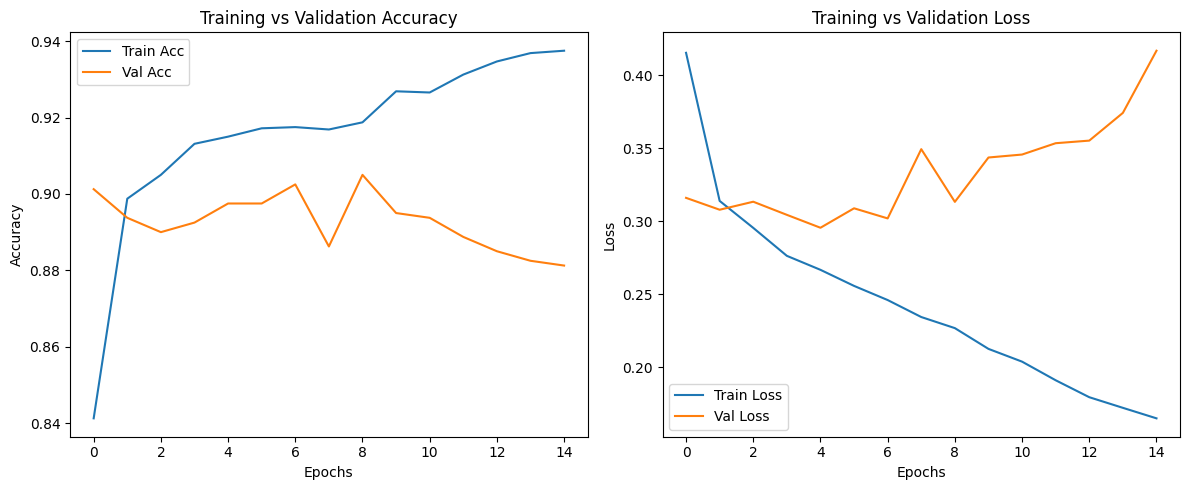

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Deployment

## Model Simulation

In [ ]:
print(X.columns.tolist())
print(len(X.columns))

['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS', 'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL', 'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION', 'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS', 'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE']
17


In [ ]:
# Cek urutan kolom agar sesuai
feature_names = [
    "AGE", "GENDER", "SMOKING", "FINGER_DISCOLORATION", "MENTAL_STRESS",
    "EXPOSURE_TO_POLLUTION", "LONG_TERM_ILLNESS", "ENERGY_LEVEL",
    "IMMUNE_WEAKNESS", "BREATHING_ISSUE", "ALCOHOL_CONSUMPTION",
    "THROAT_DISCOMFORT", "OXYGEN_SATURATION", "CHEST_TIGHTNESS",
    "FAMILY_HISTORY", "SMOKING_FAMILY_HISTORY", "STRESS_IMMUNE"
]

# Simulasi data pasien baru - URUT SESUAI KOLOM
sample_data = pd.DataFrame([[
    55,   # AGE
    1,    # GENDER
    1,    # SMOKING
    0,    # FINGER_DISCOLORATION
    1,    # MENTAL_STRESS
    1,    # EXPOSURE_TO_POLLUTION
    0,    # LONG_TERM_ILLNESS
    57.0, # ENERGY_LEVEL
    0,    # IMMUNE_WEAKNESS
    1,    # BREATHING_ISSUE
    0,    # ALCOHOL_CONSUMPTION
    1,    # THROAT_DISCOMFORT
    90.0, # OXYGEN_SATURATION
    1,    # CHEST_TIGHTNESS
    0,    # FAMILY_HISTORY
    0,    # SMOKING_FAMILY_HISTORY
    1     # STRESS_IMMUNE
]], columns=feature_names)

# Normalisasi input
sample_scaled = scaler.transform(sample_data)

# Prediksi
pred_prob = model.predict(sample_scaled)
pred_class = (pred_prob > 0.5).astype(int)

# Hasil
print(f"Probabilitas kanker paru: {pred_prob[0][0]:.2f}")
print(f"Prediksi: {'YES' if pred_class[0][0] == 1 else 'NO'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Probabilitas kanker paru: 0.96
Prediksi: YES


## Save Model

In [ ]:
# Simpan model ke file HDF5
model.save("lung_cancer.h5")
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']

In [ ]:
model = tf.keras.models.load_model('./lung_cancer.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = ['tf.lite.Optimize.DEFAULT']
tflite_model = converter.convert()
open('lungcancer.tflite', 'wb').write(tflite_model)

Saved artifact at '/tmp/tmpmpk5vp_0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 17), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140179431076496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140179431078032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140179431077840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140179431076688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140177573693392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140177573694736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140177573695312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140177573696080: TensorSpec(shape=(), dtype=tf.resource, name=None)


53132